In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Summary of Data

In [15]:

file =pd.read_csv("insurance.csv")
print("Summary of dataframe :")
file.describe() # Gives statistics of data 


Summary of dataframe :


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Histograms for every data

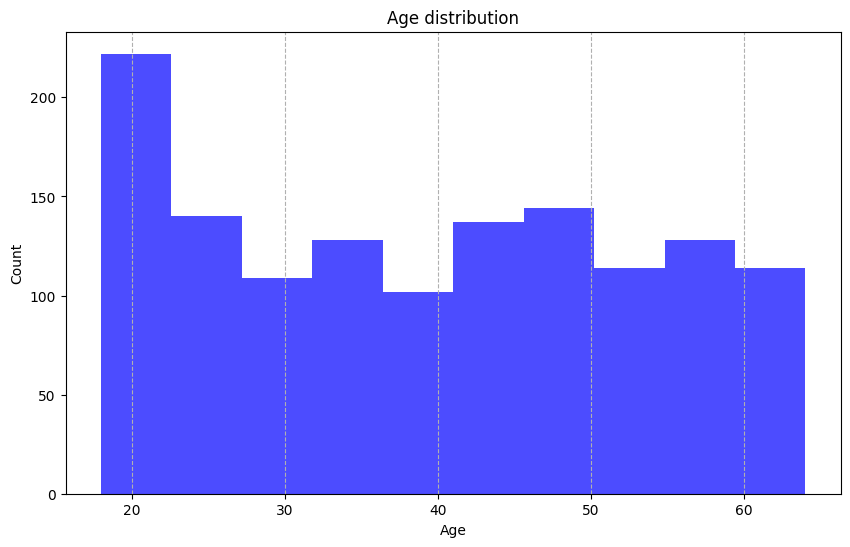

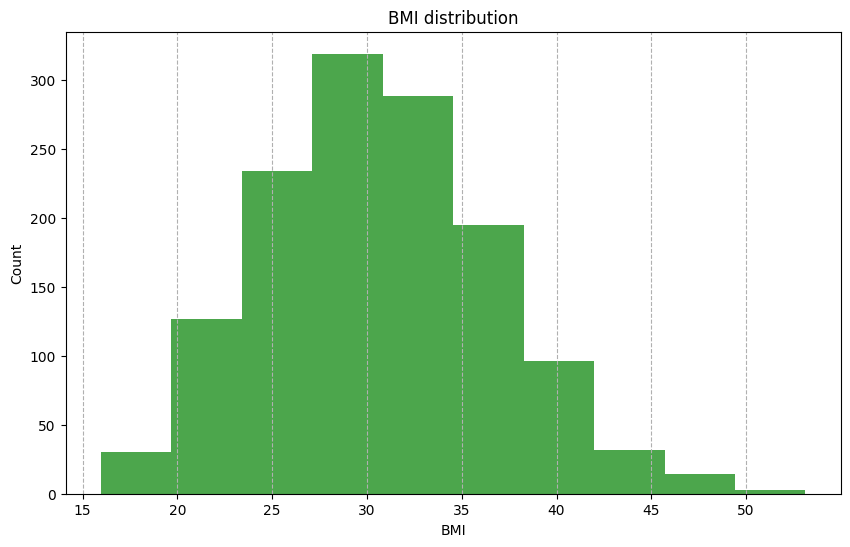

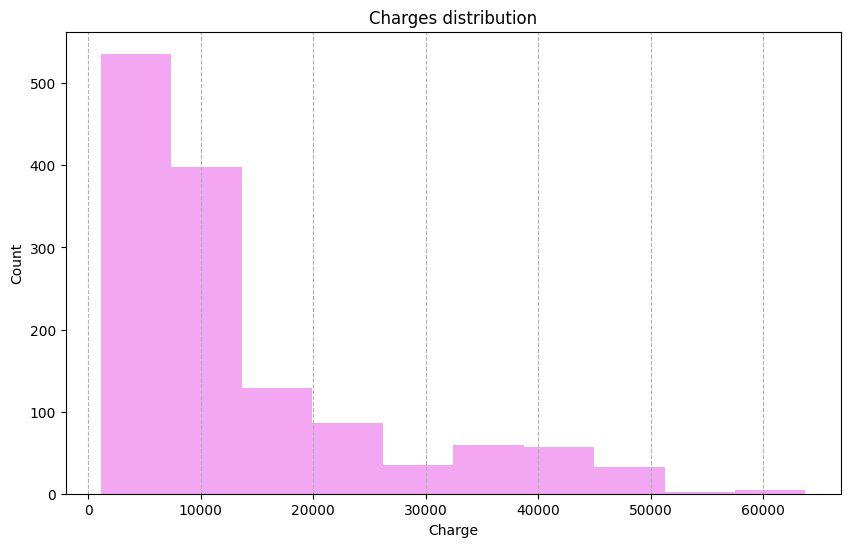

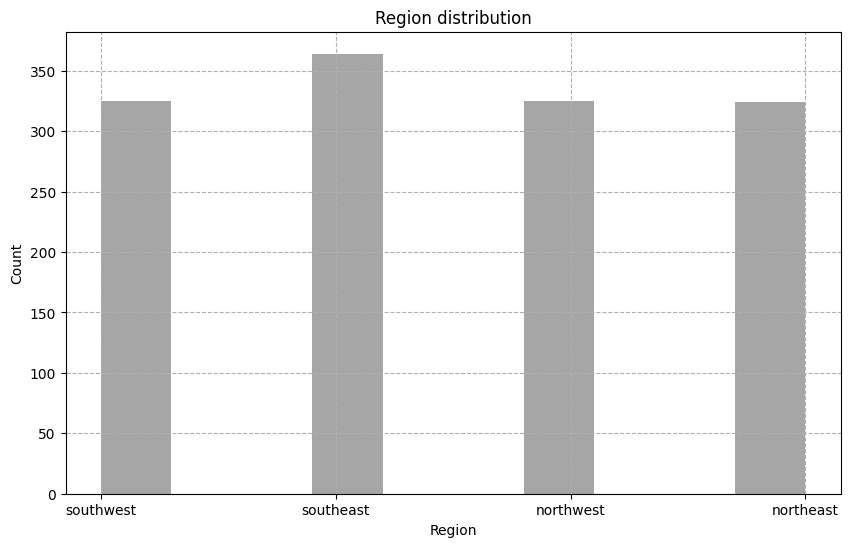

In [17]:



#Age histogram
plt.figure(figsize=(10,6))
plt.hist(file['age'],bins=10,color='blue',alpha=0.7)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='x', linestyle='--')
plt.show()

#BMI histogram
file =pd.read_csv("insurance.csv")
plt.figure(figsize=(10,6))
plt.hist(file['bmi'],bins=10,color='green',alpha=0.7)
plt.title('BMI distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.grid(axis='x', linestyle='--')
plt.show()

#Charges histogram
file =pd.read_csv("insurance.csv")
plt.figure(figsize=(10,6))
plt.hist(file['charges'],bins=10,color='violet',alpha=0.7)
plt.title('Charges distribution')
plt.xlabel('Charge')
plt.ylabel('Count')
plt.grid(axis='x', linestyle='--')
plt.show()

#Region histogram
file =pd.read_csv("insurance.csv")
plt.figure(figsize=(10,6))
plt.hist(file['region'],bins=10,color='grey',alpha=0.7)
plt.title('Region distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid(axis='both', linestyle='--')
plt.show()


Handling Outliers

Boxplot before removing outliers for age:



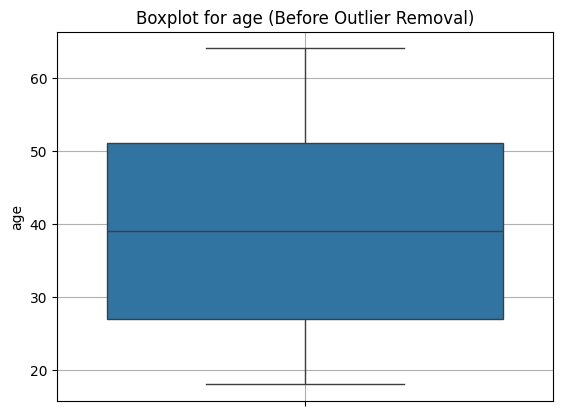

Outliers in age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Boxplot after removing outliers for age:



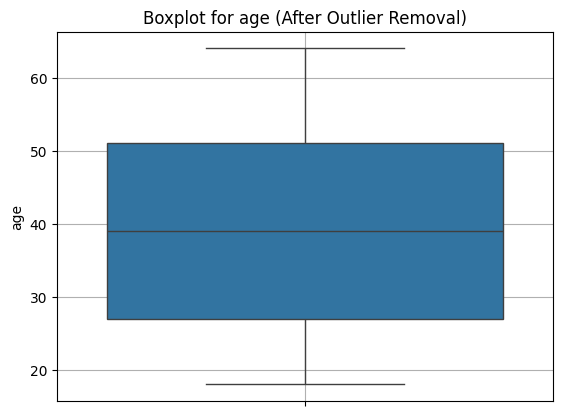

Boxplot before removing outliers for bmi:



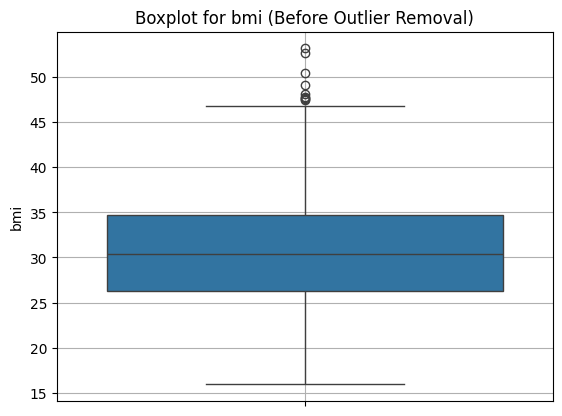

Outliers in bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
Boxplot after removing outliers for bmi:



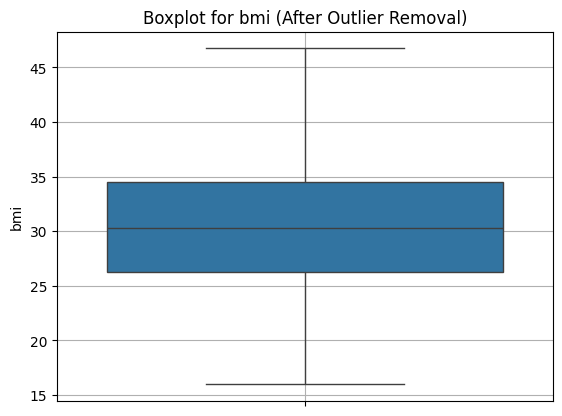

Boxplot before removing outliers for children:



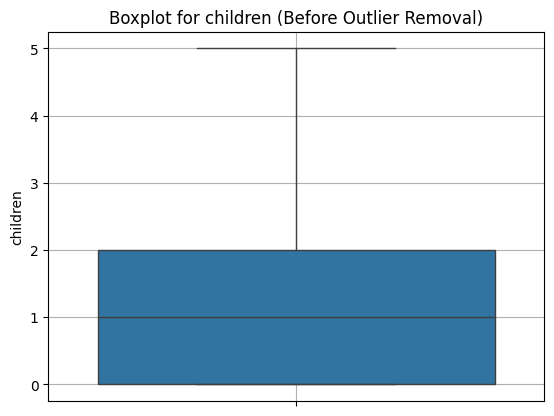

Outliers in children:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Boxplot after removing outliers for children:



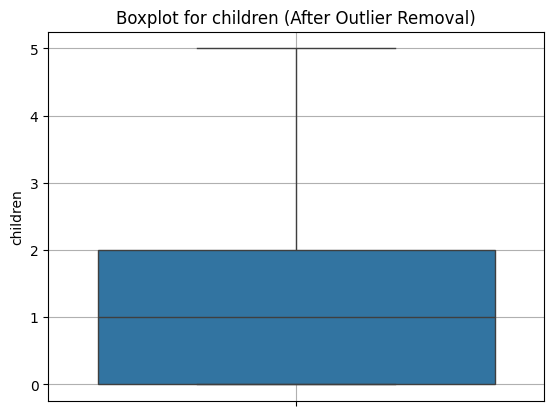

Boxplot before removing outliers for charges:



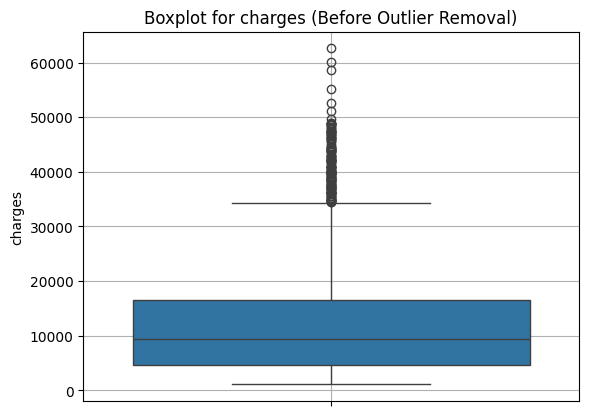

Outliers in charges:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[138 rows x 7 columns]
Boxplot after removing outliers for charges:



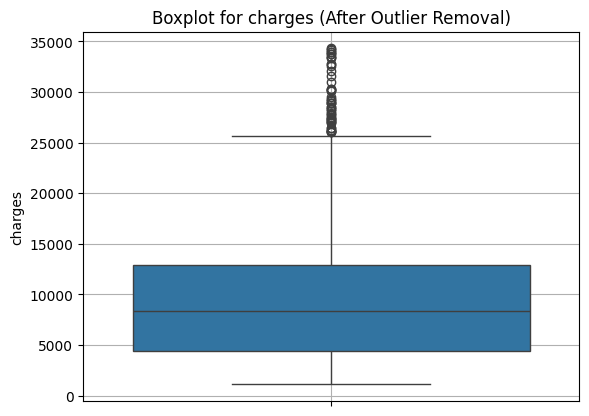

In [18]:

cols = ['age', 'bmi', 'children', 'charges']

for i in cols:
    # Boxplot before removing outliers
    print(f"Boxplot before removing outliers for {i}:\n")
    sns.boxplot(file[i], whis=1.5)
    plt.grid()
    plt.title(f"Boxplot for {i} (Before Outlier Removal)")
    plt.show()

    # Calculate Q1, Q3, and IQR
    Q1 = file[i].quantile(0.25)
    Q3 = file[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect and display outliers
    outliers = file[(file[i] < lower_bound) | (file[i] > upper_bound)]
    print(f"Outliers in {i}:")
    print(outliers)

    # Remove outliers from the dataset
    file = file[(file[i] >= lower_bound) & (file[i] <= upper_bound)]

    # Boxplot after removing outliers
    print(f"Boxplot after removing outliers for {i}:\n")
    sns.boxplot(file[i], whis=1.5)
    plt.grid()
    plt.title(f"Boxplot for {i} (After Outlier Removal)")
    plt.show()


Handle missing values

In [19]:
# Print dataset info
file.info()
print('\n')

# Check and print the count of missing values
print("The count of missing values:")
missing_values = file.isnull().sum()
print(missing_values)

# Update missing values by assigning the updated column back to the DataFrame
# Filling missing 'age' with the average age
file['age'] = file['age'].fillna(file['age'].mean())

# Filling missing 'charges' with the average charge
file['charges'] = file['charges'].fillna(file['charges'].mean())

# Filling missing 'region' with 'DNE'
file['region'] = file['region'].fillna('DNE')

# Filling missing 'smoker' with 'no'
file['smoker'] = file['smoker'].fillna('no')

# Filling missing 'sex' with 'DNE'
file['sex'] = file['sex'].fillna('DNE')

# Filling missing 'children' with 0
file['children'] = file['children'].fillna(0)

# Filling missing 'bmi' with the average BMI
file['bmi'] = file['bmi'].fillna(file['bmi'].mean())

# Print dataset info after handling missing values
print("\nData info after handling missing values:")
file.info()

file.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1191 non-null   int64  
 1   sex       1191 non-null   object 
 2   bmi       1191 non-null   float64
 3   children  1191 non-null   int64  
 4   smoker    1191 non-null   object 
 5   region    1191 non-null   object 
 6   charges   1191 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.4+ KB


The count of missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1191 non-null   int64  
 1   sex       1191 non-null   object 
 2   bmi       1191 non-null   float64
 3   

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
